In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [36]:
from matplotlib import rcParams


sns.set_style('darkgrid')
rcParams['figure.figsize']= 12.7, 7.27

In [37]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/TopVideoGames1995-2021Metacritic/all_games.csv")

In [38]:
raw_df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [41]:
games_df = raw_df.drop(columns = 'summary')
games_df.isna().sum()

name            0
platform        0
release_date    0
meta_score      0
user_review     0
dtype: int64

In [42]:
games_df['release_date']= pd.to_datetime(games_df['release_date'])
games_df['Year'] = games_df['release_date'].dt.year
games_df.drop(columns = 'release_date', inplace = True)
games_df.drop(games_df[games_df['user_review'] == 'tbd'].index)

,name,platform,meta_score,user_review,Year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,99,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,98,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,98,7.7,2008
3,SoulCalibur,Dreamcast,98,8.4,1999
4,Grand Theft Auto IV,Xbox 360,98,7.9,2008
...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,22,1.3,2013
18796,Drake of the 99 Dragons,Xbox,22,1.7,2003
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,21,2.9,2015
18798,Infestation: Survivor Stories (The War Z),PC,20,1.7,2012


In [44]:
games_df.head()

,name,platform,meta_score,user_review,Year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,99,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,98,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,98,7.7,2008
3,SoulCalibur,Dreamcast,98,8.4,1999
4,Grand Theft Auto IV,Xbox 360,98,7.9,2008


In [45]:
gpc = games_df['platform'].value_counts().reset_index()
gpc.columns = ['platform', 'count']
gpc

,platform,count
0,PC,4864
1,PlayStation 4,2056
2,Xbox 360,1644
3,PlayStation 2,1414
4,Switch,1399
5,PlayStation 3,1256
6,Xbox One,1179
7,Xbox,789
8,DS,720
9,Wii,655


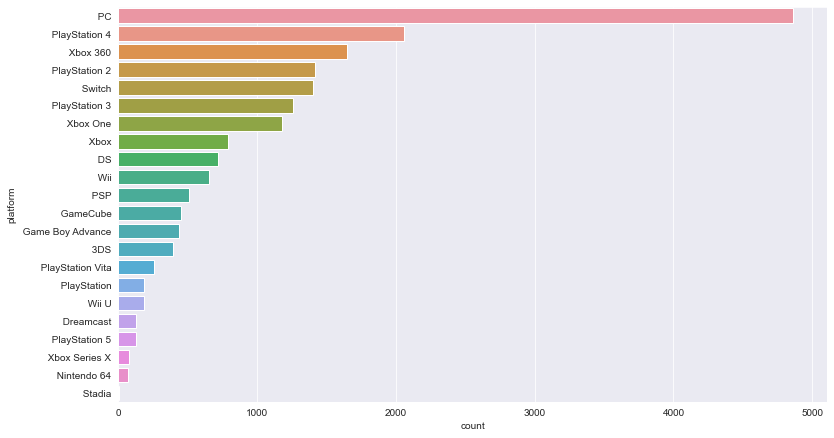

In [46]:
sns.barplot(x = 'count',y = 'platform', data = gpc);

In [48]:
games_df.head()

,name,platform,meta_score,user_review,Year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,99,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,98,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,98,7.7,2008
3,SoulCalibur,Dreamcast,98,8.4,1999
4,Grand Theft Auto IV,Xbox 360,98,7.9,2008


In [49]:
ypm = games_df.groupby('Year')['meta_score'].sum().reset_index()
ypm = ypm.sort_values('meta_score', ascending = False)
ypm

,Year,meta_score
23,2018,82678
25,2020,78257
22,2017,76246
24,2019,73645
21,2016,70082
14,2009,66381
13,2008,62826
12,2007,61642
20,2015,61601
10,2005,59911


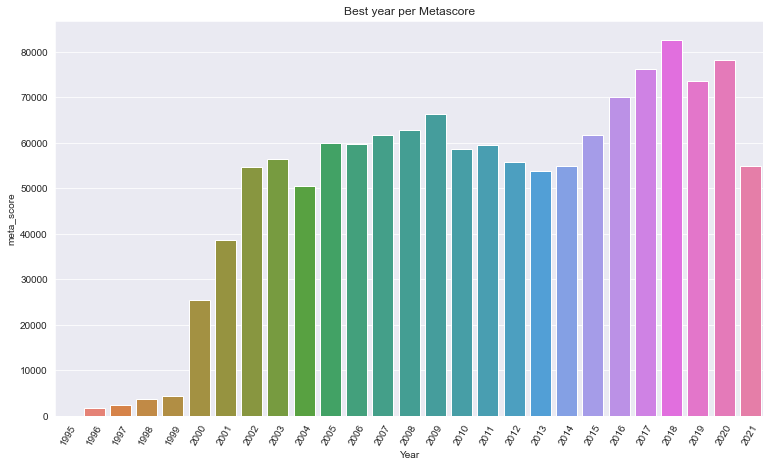

In [50]:
sns.barplot(x = 'Year', y = 'meta_score', data = ypm, palette='husl')
plt.title('Best year per Metascore');
plt.xticks(rotation = 60);

In [51]:
tpm = games_df[['name', 'platform', 'meta_score']].sort_values('meta_score', ascending = False)[:10]
tpm

,name,platform,meta_score
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,99
2,Grand Theft Auto IV,PlayStation 3,98
3,SoulCalibur,Dreamcast,98
4,Grand Theft Auto IV,Xbox 360,98
1,Tony Hawk's Pro Skater 2,PlayStation,98
14,Tony Hawk's Pro Skater 3,PlayStation 2,97
23,NFL 2K1,Dreamcast,97
22,The House in Fata Morgana - Dreams of the Reve...,Switch,97
21,Halo: Combat Evolved,Xbox,97
20,Super Mario Odyssey,Switch,97


In [52]:
tpu = games_df.drop(games_df[games_df['user_review'] == 'tbd'].index)
tpur = tpu[['name', 'platform', 'user_review']].sort_values('user_review', ascending = False)[:10]
tpur["user_review"] = tpur["user_review"].apply(pd.to_numeric)
tpur

,name,platform,user_review
3504,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,PSP,9.7
2450,Ghost Trick: Phantom Detective,DS,9.7
4953,Rochard,PlayStation 3,9.7
14836,Metal Torrent,DS,9.7
9550,After Burner Climax,Xbox 360,9.7
4844,GrimGrimoire,PlayStation 2,9.7
10936,Tengami,Wii U,9.7
12434,Crystar,PlayStation 4,9.6
4573,Superliminal,Xbox One,9.6
7638,Superliminal,Switch,9.6


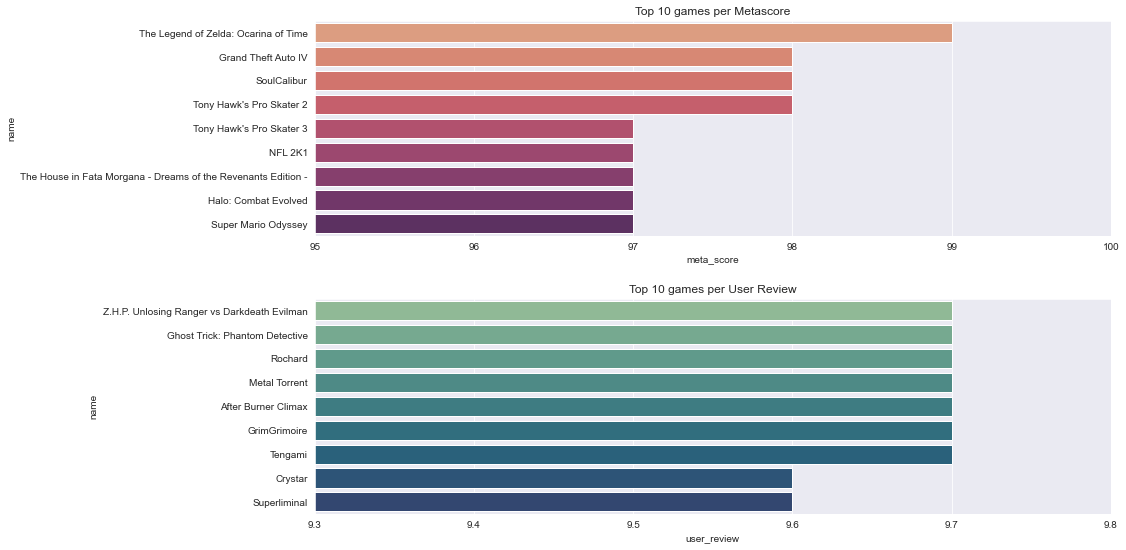

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 8))

ax1.set_title('Top 10 games per Metascore')
ax1.set_xlim(95, 100)
sns.barplot(y = 'name', x = 'meta_score', data = tpm, ax = ax1, palette = 'flare');

ax2.set_title('Top 10 games per User Review')
ax2.set_xlim(9.3, 9.8)
sns.barplot(y = 'name', x = 'user_review', data = tpur, ax = ax2, palette = 'crest')

plt.tight_layout(pad = 2)

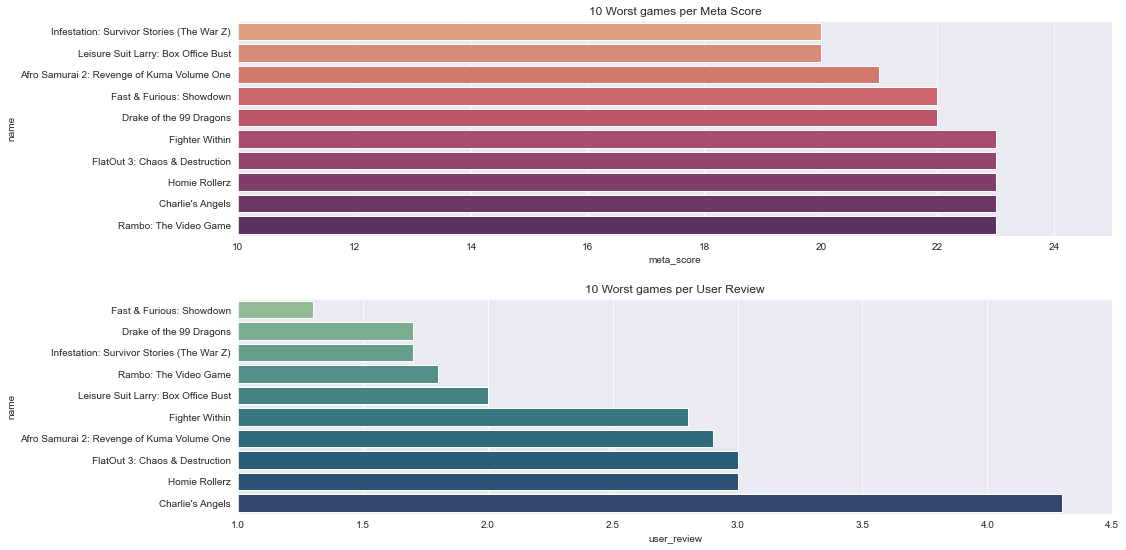

In [54]:
worst_pms = games_df[['name', 'platform', 'meta_score']].tail(10).sort_values('meta_score', ascending = True)
worst_pus = games_df[['name', 'platform', 'user_review']].tail(10).sort_values('user_review', ascending = True)
worst_pus["user_review"] = worst_pus["user_review"].apply(pd.to_numeric)
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (16,8))

ax1.set_title('10 Worst games per Meta Score');
ax1.set_xlim(10,25)
sns.barplot(x = 'meta_score', y = 'name', data = worst_pms, ax = ax1, palette = 'flare');

ax2.set_title('10 Worst games per User Review')
ax2.set_xlim(1,4.5)
sns.barplot(x = 'user_review', y = 'name', data = worst_pus, ax = ax2, palette = 'crest')


plt.tight_layout(pad = 2)